<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.317634,39.697329,36.984595,79.651018,-65.261096,199.389481,-202.329451,401.718932
1,0.0,1.0,53.073319,33.131086,29.105955,86.068721,-613.791018,-402.411937,-513.850159,111.438222
2,0.0,2.0,42.475925,93.173839,54.530867,62.652557,599.420279,862.253466,-1208.244008,2070.497474
3,0.0,3.0,82.570706,85.174969,43.617848,96.640347,-2953.355372,-2635.351502,-1255.666848,-1379.684655
4,0.0,4.0,49.620628,90.348318,80.070951,99.630682,-2763.866005,-2434.195427,-1103.022583,-1331.172844
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,35.638369,59.870299,75.149181,88.622452,-2807.017017,-2537.736717,-432.513603,-2105.223114
19996,999.0,16.0,48.521914,87.008363,28.807485,89.869897,-2447.928914,-2183.721255,712.004083,-2895.725338
19997,999.0,17.0,98.402114,67.376676,83.154207,57.047123,2888.035012,3204.015132,1817.659144,1386.355988
19998,999.0,18.0,64.126171,92.346324,29.921907,89.086596,6030.152135,6315.633133,1395.019151,4920.613982


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.317634,39.697329,36.984595,79.651018,-65.261096,199.389481,-202.329451,401.718932
1,0.0,1.0,53.073319,33.131086,29.105955,86.068721,-613.791018,-402.411937,-513.850159,111.438222
2,0.0,2.0,42.475925,93.173839,54.530867,62.652557,599.420279,862.253466,-1208.244008,2070.497474
3,0.0,3.0,82.570706,85.174969,43.617848,96.640347,-2953.355372,-2635.351502,-1255.666848,-1379.684655
4,0.0,4.0,49.620628,90.348318,80.070951,99.630682,-2763.866005,-2434.195427,-1103.022583,-1331.172844
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,35.638369,59.870299,75.149181,88.622452,-2807.017017,-2537.736717,-432.513603,-2105.223114
19996,999.0,16.0,48.521914,87.008363,28.807485,89.869897,-2447.928914,-2183.721255,712.004083,-2895.725338
19997,999.0,17.0,98.402114,67.376676,83.154207,57.047123,2888.035012,3204.015132,1817.659144,1386.355988
19998,999.0,18.0,64.126171,92.346324,29.921907,89.086596,6030.152135,6315.633133,1395.019151,4920.613982


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    98.317634  39.697329  36.984595  79.651018   -65.261096   
      1.0    53.073319  33.131086  29.105955  86.068721  -613.791018   
      2.0    42.475925  93.173839  54.530867  62.652557   599.420279   
      3.0    82.570706  85.174969  43.617848  96.640347 -2953.355372   
      4.0    49.620628  90.348318  80.070951  99.630682 -2763.866005   
...                ...        ...        ...        ...          ...   
999.0 15.0   35.638369  59.870299  75.149181  88.622452 -2807.017017   
      16.0   48.521914  87.008363  28.807485  89.869897 -2447.928914   
      17.0   98.402114  67.376676  83.154207  57.047123  2888.035012   
      18.0   64.126171  92.346324  29.921907  89.086596  6030.152135   
      19.0   84.454460  54.923922  63.739434  27.137755 -1153.783973   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     199.389481  -202.329451   401.718932  
      1.0    -402.411937  -513.850159   111.438222  
      2.0     862.253466 -1208.244008  2070.497474  
      3.0   -2635.351502 -1255.666848 -1379.684655  
      4.0   -2434.195427 -1103.022583 -1331.172844  
...                  ...          ...          ...  
999.0 15.0  -2537.736717  -432.513603 -2105.223114  
      16.0  -2183.721255   712.004083 -2895.725338  
      17.0   3204.015132  1817.659144  1386.355988  
      18.0   6315.633133  1395.019151  4920.613982  
      19.0   -913.528403   857.523395 -1771.051798  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    98.317634  39.697329  36.984595  79.651018   -65.261096   
      1.0    53.073319  33.131086  29.105955  86.068721  -613.791018   
      2.0    42.475925  93.173839  54.530867  62.652557   599.420279   
      3.0    82.570706  85.174969  43.617848  96.640347 -2953.355372   
      4.0    49.620628  90.348318  80.070951  99.630682 -2763.866005   
...                ...        ...        ...        ...          ...   
999.0 15.0   35.638369  59.870299  75.149181  88.622452 -2807.017017   
      16.0   48.521914  87.008363  28.807485  89.869897 -2447.928914   
      17.0   98.402114  67.376676  83.154207  57.047123  2888.035012   
      18.0   64.126171  92.346324  29.921907  89.086596  6030.152135   
      19.0   84.454460  54.923922  63.739434  27.137755 -1153.783973   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     199.389481  -202.329451   401.718932  
      1.0    -402.411937  -513.850159   111.438222  
      2.0     862.253466 -1208.244008  2070.497474  
      3.0   -2635.351502 -1255.666848 -1379.684655  
      4.0   -2434.195427 -1103.022583 -1331.172844  
...                  ...          ...          ...  
999.0 15.0  -2537.736717  -432.513603 -2105.223114  
      16.0  -2183.721255   712.004083 -2895.725338  
      17.0   3204.015132  1817.659144  1386.355988  
      18.0   6315.633133  1395.019151  4920.613982  
      19.0   -913.528403   857.523395 -1771.051798  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.317634,39.697329,36.984595,79.651018,-65.261096,199.389481,-202.329451,401.718932
1,0.0,1.0,53.073319,33.131086,29.105955,86.068721,-613.791018,-402.411937,-513.850159,111.438222
2,0.0,2.0,42.475925,93.173839,54.530867,62.652557,599.420279,862.253466,-1208.244008,2070.497474
3,0.0,3.0,82.570706,85.174969,43.617848,96.640347,-2953.355372,-2635.351502,-1255.666848,-1379.684655
4,0.0,4.0,49.620628,90.348318,80.070951,99.630682,-2763.866005,-2434.195427,-1103.022583,-1331.172844
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,35.638369,59.870299,75.149181,88.622452,-2807.017017,-2537.736717,-432.513603,-2105.223114
19996,999.0,16.0,48.521914,87.008363,28.807485,89.869897,-2447.928914,-2183.721255,712.004083,-2895.725338
19997,999.0,17.0,98.402114,67.376676,83.154207,57.047123,2888.035012,3204.015132,1817.659144,1386.355988
19998,999.0,18.0,64.126171,92.346324,29.921907,89.086596,6030.152135,6315.633133,1395.019151,4920.613982


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    98.317634  39.697329  36.984595  79.651018   -65.261096   
      1.0    53.073319  33.131086  29.105955  86.068721  -613.791018   
      2.0    42.475925  93.173839  54.530867  62.652557   599.420279   
      3.0    82.570706  85.174969  43.617848  96.640347 -2953.355372   
      4.0    49.620628  90.348318  80.070951  99.630682 -2763.866005   
...                ...        ...        ...        ...          ...   
999.0 15.0   35.638369  59.870299  75.149181  88.622452 -2807.017017   
      16.0   48.521914  87.008363  28.807485  89.869897 -2447.928914   
      17.0   98.402114  67.376676  83.154207  57.047123  2888.035012   
      18.0   64.126171  92.346324  29.921907  89.086596  6030.152135   
      19.0   84.454460  54.923922  63.739434  27.137755 -1153.783973   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     199.389481  -202.329451   401.718932  
      1.0    -402.411937  -513.850159   111.438222  
      2.0     862.253466 -1208.244008  2070.497474  
      3.0   -2635.351502 -1255.666848 -1379.684655  
      4.0   -2434.195427 -1103.022583 -1331.172844  
...                  ...          ...          ...  
999.0 15.0  -2537.736717  -432.513603 -2105.223114  
      16.0  -2183.721255   712.004083 -2895.725338  
      17.0   3204.015132  1817.659144  1386.355988  
      18.0   6315.633133  1395.019151  4920.613982  
      19.0   -913.528403   857.523395 -1771.051798  

[20000 rows x 8 columns]

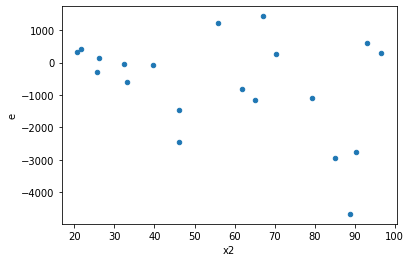

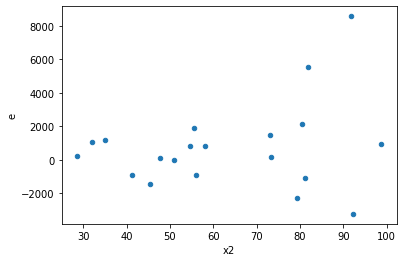

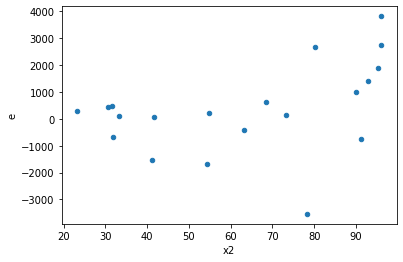

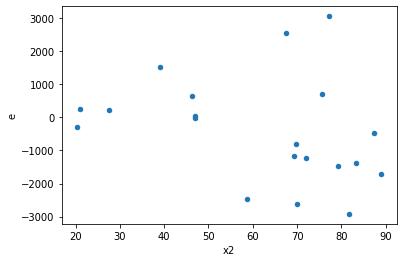

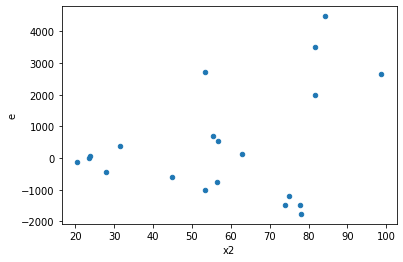

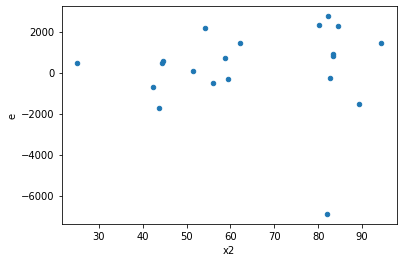

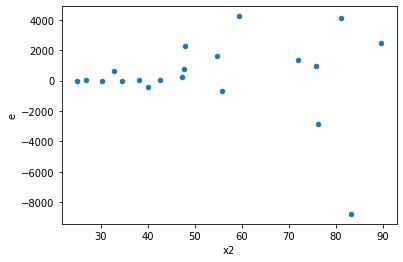

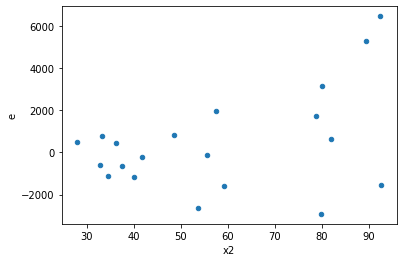

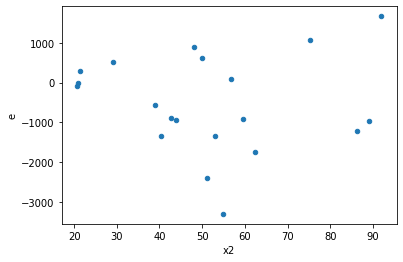

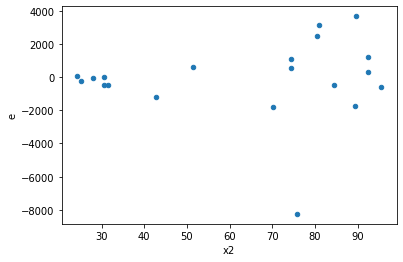

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,828594.4095332301,24951803.48050835,207148.60238330753,6237950.870127087,30.1134103651078,0.006065257597367202,0.9969673712013164,0.003032628798683601,Reject001=0 : Heteroscedasticity
1.0,4.0,4.0,838707.7739305639,92284977.91986813,209676.94348264099,23071244.47996703,110.03233878157464,0.00048376762313240285,0.9997581161884338,0.00024188381156620142,Reject001=0 : Heteroscedasticity
2.0,4.0,4.0,1692514.864306548,10341512.348927245,423128.716076637,2585378.087231811,6.110145657813374,0.10755637929762862,0.9462218103511857,0.05377818964881431,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,1643087.4732575987,15507730.803489307,410771.8683143997,3876932.7008723267,9.438165073916334,0.05155133706065684,0.9742243314696716,0.02577566853032842,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,5451219.455460394,8122813.473007196,1362804.8638650985,2030703.368251799,1.490091077670834,0.7085872254255219,0.6457063872872391,0.35429361271276094,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,5961289.431588914,36669242.34357354,1490322.3578972286,9167310.585893385,6.1512266371874125,0.10638738537019576,0.9468063073149021,0.05319369268509788,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,200864.30194585375,67318864.92584832,50216.07548646344,16829716.23146208,335.14598798145437,5.299479416143171e-05,0.9999735026029193,2.6497397080715857e-05,Reject001=0 : Heteroscedasticity
7.0,4.0,4.0,1993970.4363370284,24083492.9130768,498492.6090842571,6020873.2282692,12.078159472273198,0.033291654891980604,0.9833541725540097,0.016645827445990302,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,298796.36343945697,9797468.694001233,74699.09085986424,2449367.1735003083,32.78978559585591,0.005151410585804372,0.9974242947070978,0.002575705292902186,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,828594.4095332301,24951803.48050835,207148.60238330753,6237950.870127087,30.1134103651078,0.006065257597367202,Reject001=0 : Heteroscedasticity
1.0,4.0,4.0,838707.7739305639,92284977.91986813,209676.94348264099,23071244.47996703,110.03233878157464,0.00048376762313240285,Reject001=0 : Heteroscedasticity
2.0,4.0,4.0,1692514.864306548,10341512.348927245,423128.716076637,2585378.087231811,6.110145657813374,0.10755637929762862,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,1643087.4732575987,15507730.803489307,410771.8683143997,3876932.7008723267,9.438165073916334,0.05155133706065684,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,5451219.455460394,8122813.473007196,1362804.8638650985,2030703.368251799,1.490091077670834,0.7085872254255219,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,5961289.431588914,36669242.34357354,1490322.3578972286,9167310.585893385,6.1512266371874125,0.10638738537019576,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,200864.30194585375,67318864.92584832,50216.07548646344,16829716.23146208,335.14598798145437,5.299479416143171e-05,Reject001=0 : Heteroscedasticity
7.0,4.0,4.0,1993970.4363370284,24083492.9130768,498492.6090842571,6020873.2282692,12.078159472273198,0.033291654891980604,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,298796.36343945697,9797468.694001233,74699.09085986424,2449367.1735003083,32.78978559585591,0.005151410585804372,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      594
Reject001=0 : Heteroscedasticity    406
Name: Result_test, dtype: int64